In [102]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import numpy as np


warnings.filterwarnings("ignore")

In [103]:
df = pd.read_csv("SPF.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


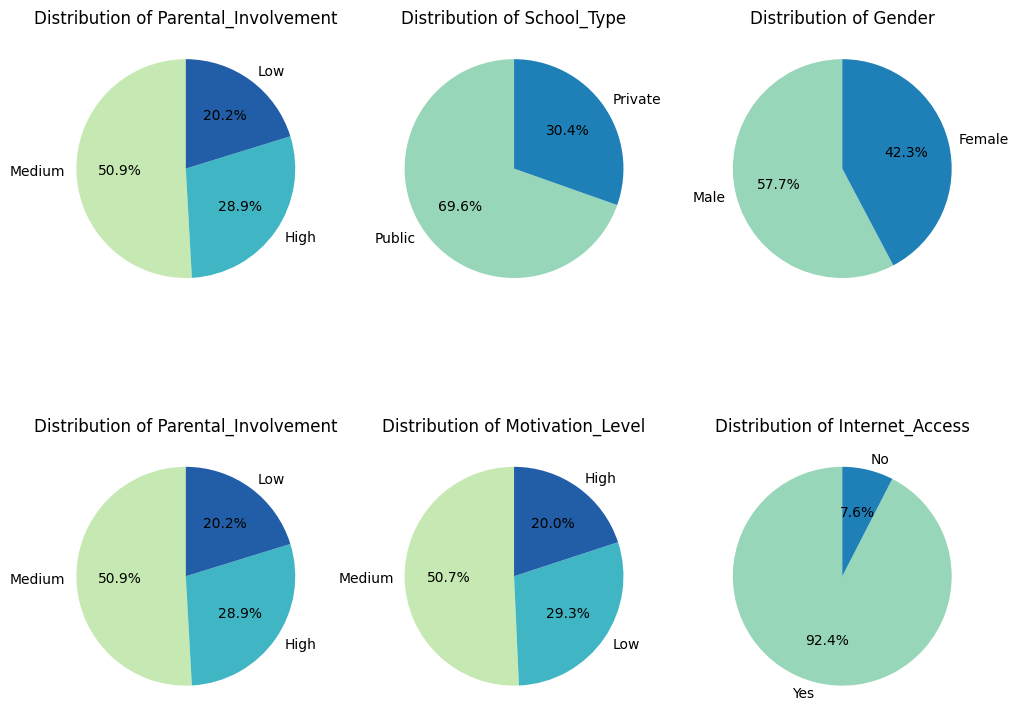

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Parental_Involvement', 'School_Type', 'Gender','Parental_Involvement','Motivation_Level','Internet_Access']

plt.figure(figsize=(12, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    counts = df[feature].value_counts()
    colors = sns.color_palette("YlGnBu", len(counts))  # Generate colors automatically
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Distribution of {feature}')



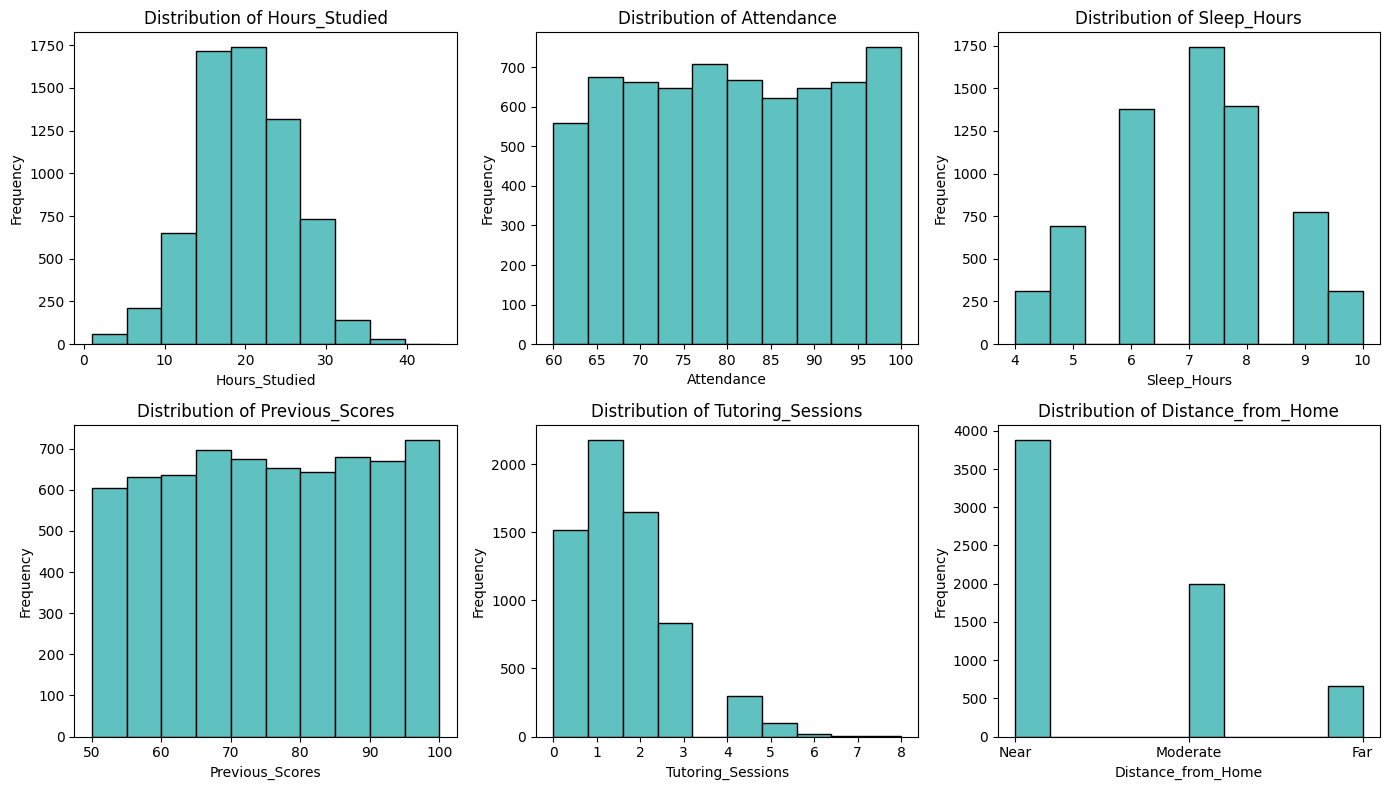

In [105]:
import matplotlib.pyplot as plt

numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Distance_from_Home']


plt.figure(figsize=(14,8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[feature].dropna(), bins=10, color=plt.get_cmap('YlGnBu')(0.44), edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

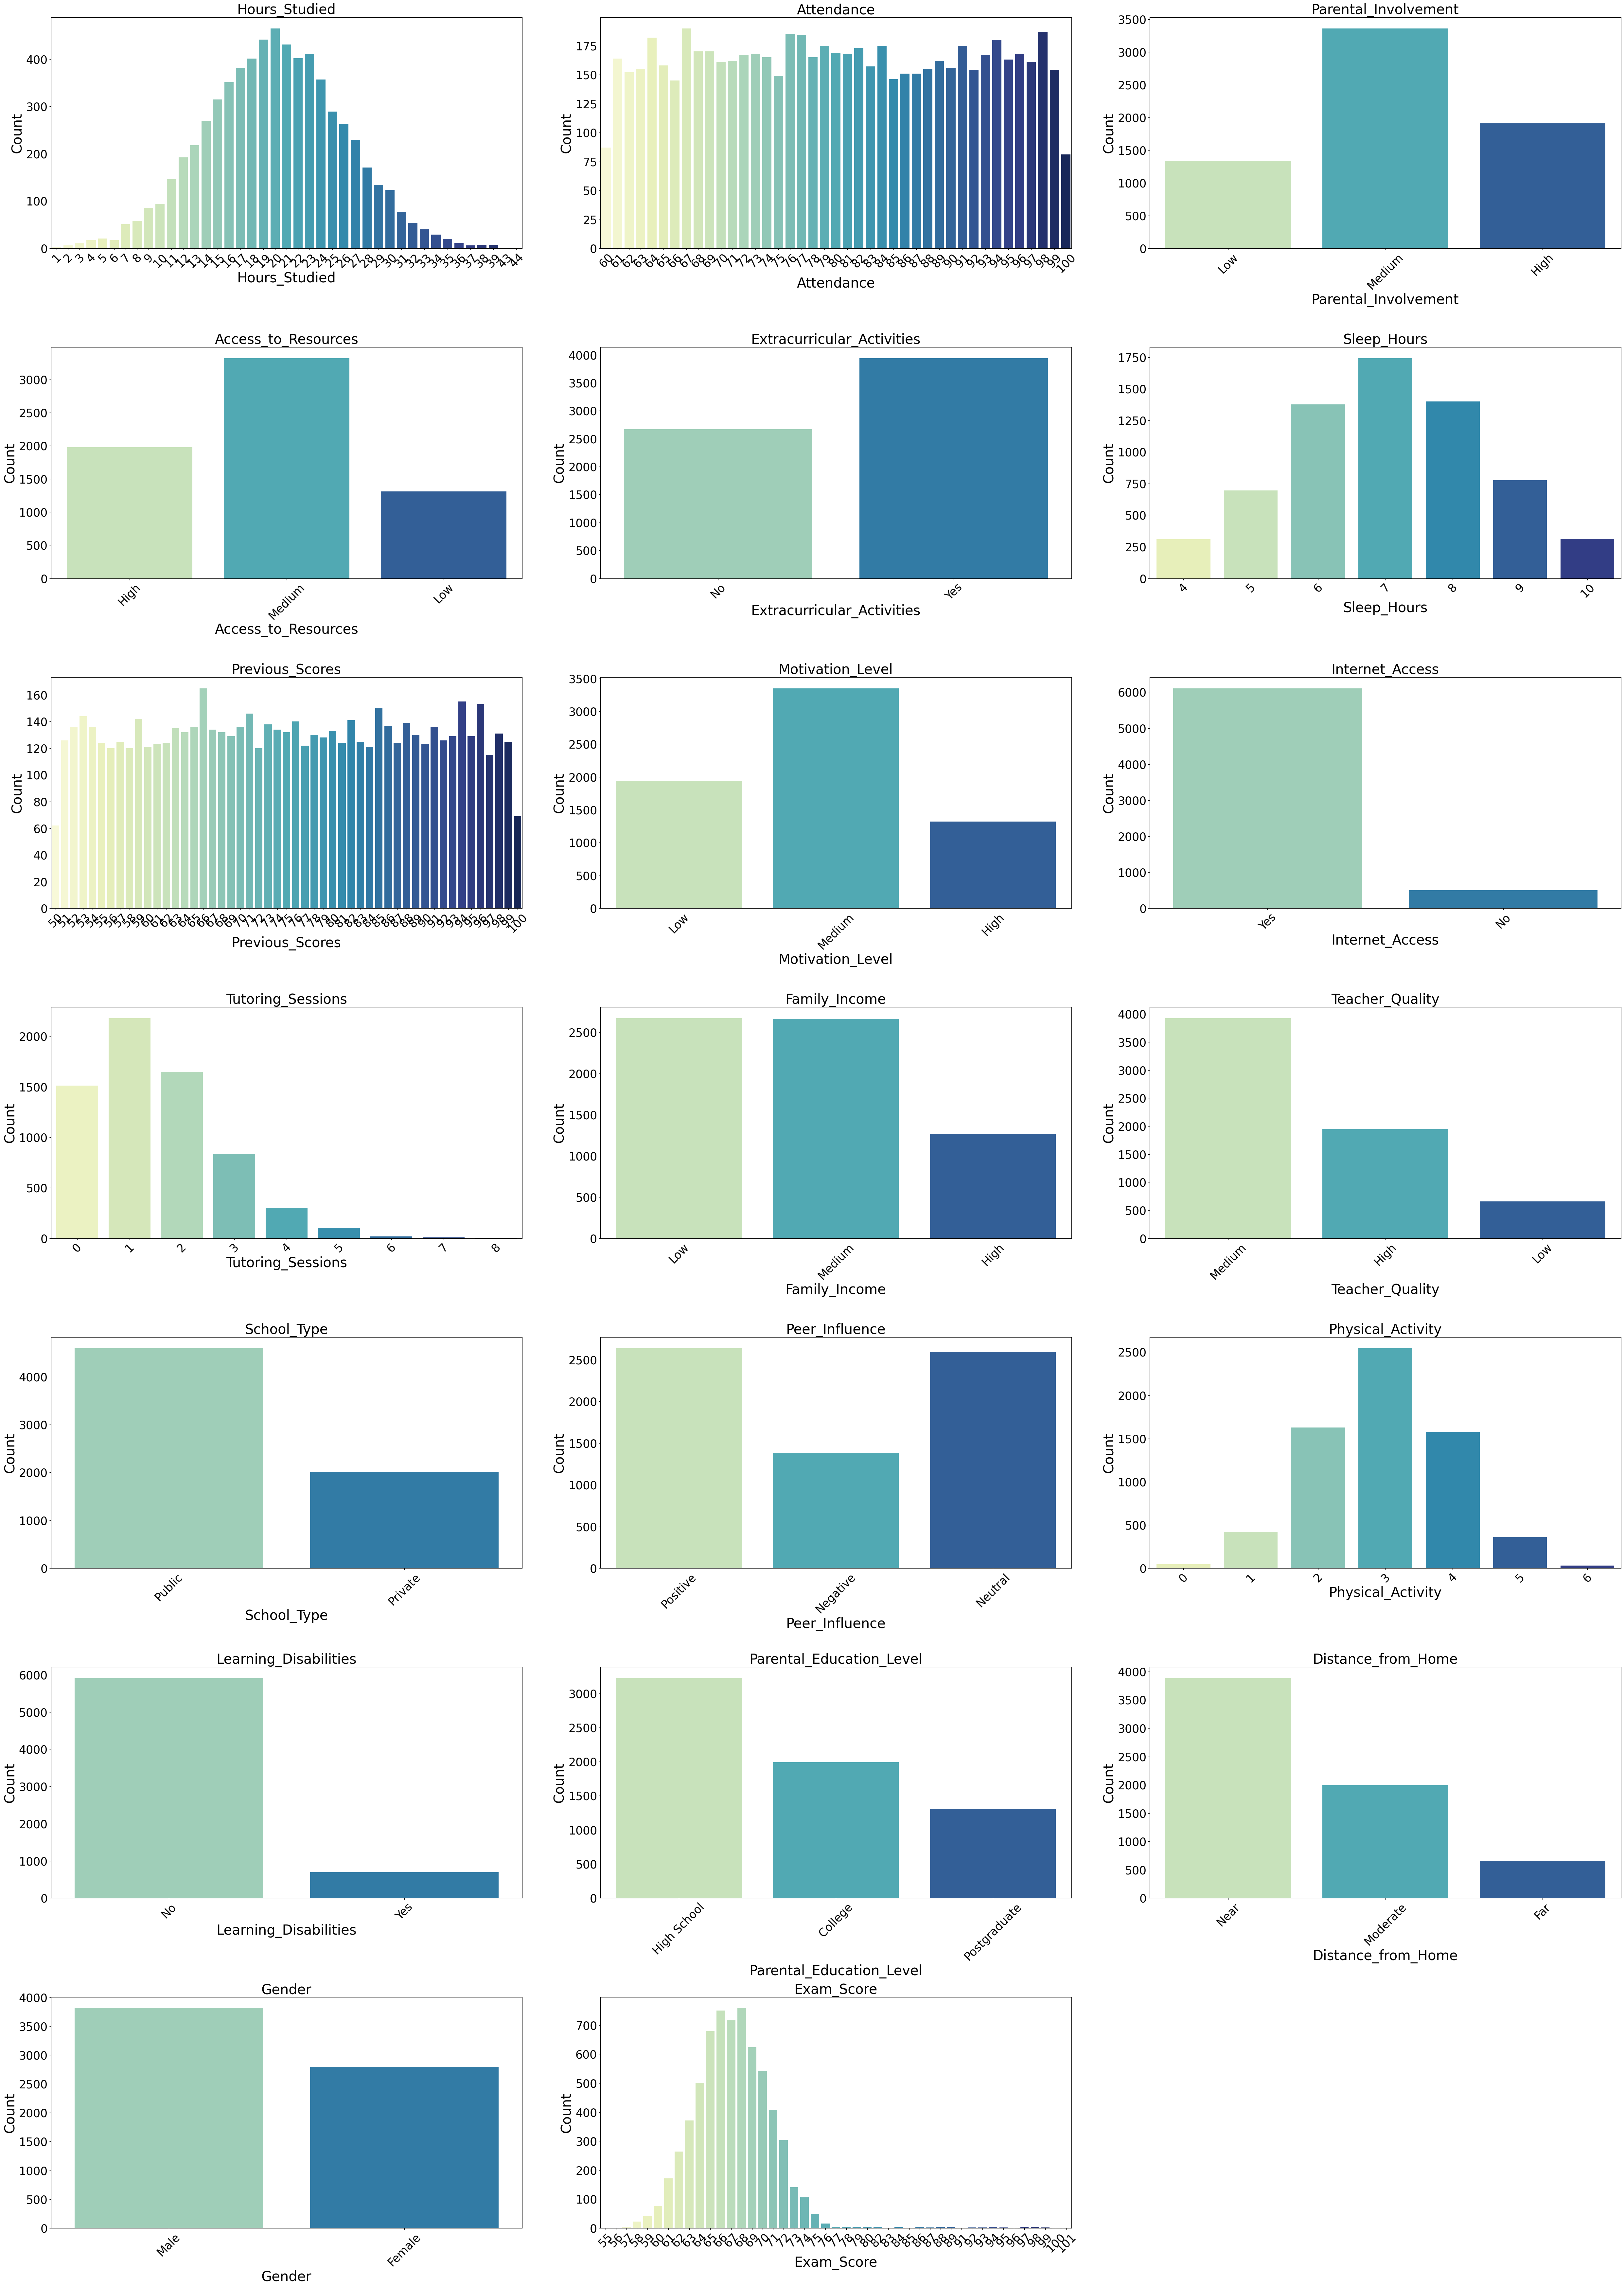

In [106]:
features = df.columns

plt.figure(figsize=(50, 70))


for i, feature in enumerate(features, 1):
      plt.subplot(7, 3, i)
      sns.countplot(x=feature, data=df, palette='YlGnBu')
      plt.xticks(rotation=45)
      plt.xticks(rotation=45, fontsize=25)
      plt.yticks(fontsize=25)
      plt.xlabel(feature, fontsize=30)
      plt.ylabel("Count", fontsize=30)
      plt.title(feature, fontsize=30)
plt.subplots_adjust(hspace=20, wspace=20)
plt.tight_layout()
plt.show()

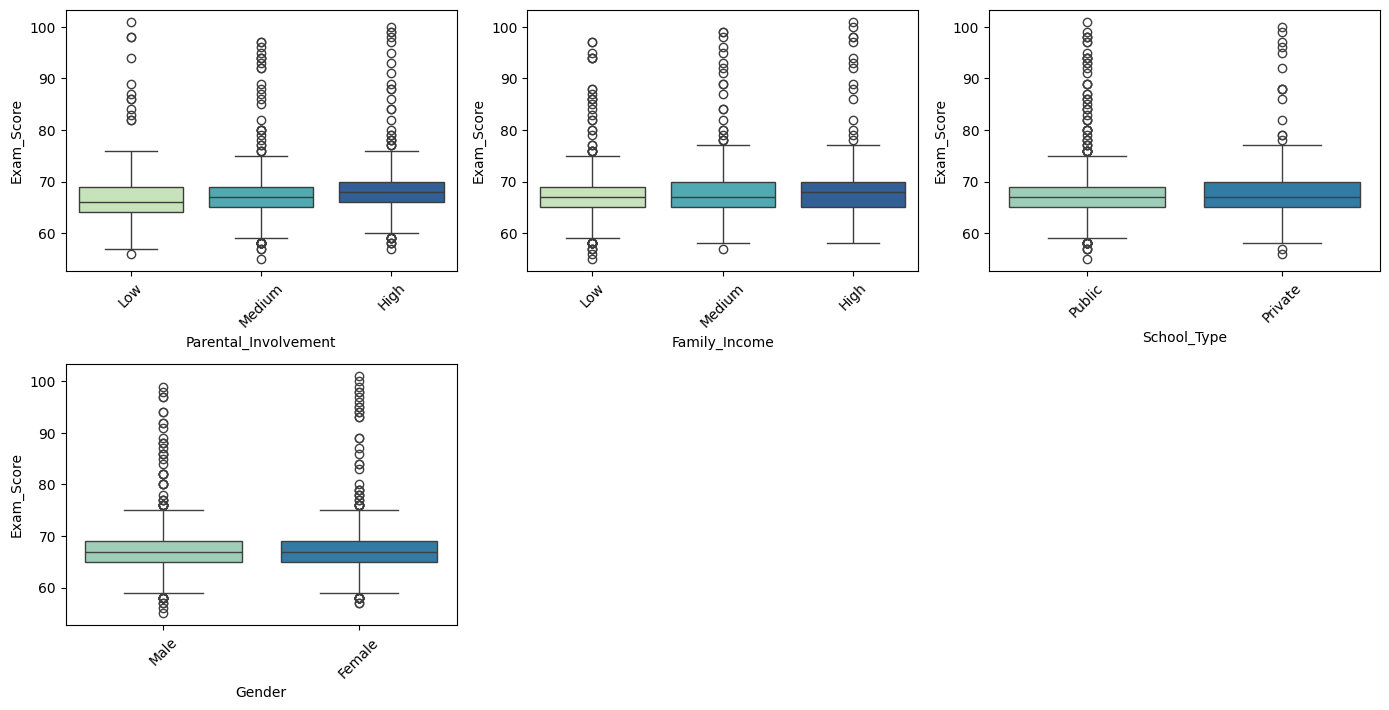

In [107]:
#box-plot
features = ['Parental_Involvement', 'Family_Income','School_Type', 'Gender']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=feature, y="Exam_Score", data=df,
                palette='YlGnBu')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

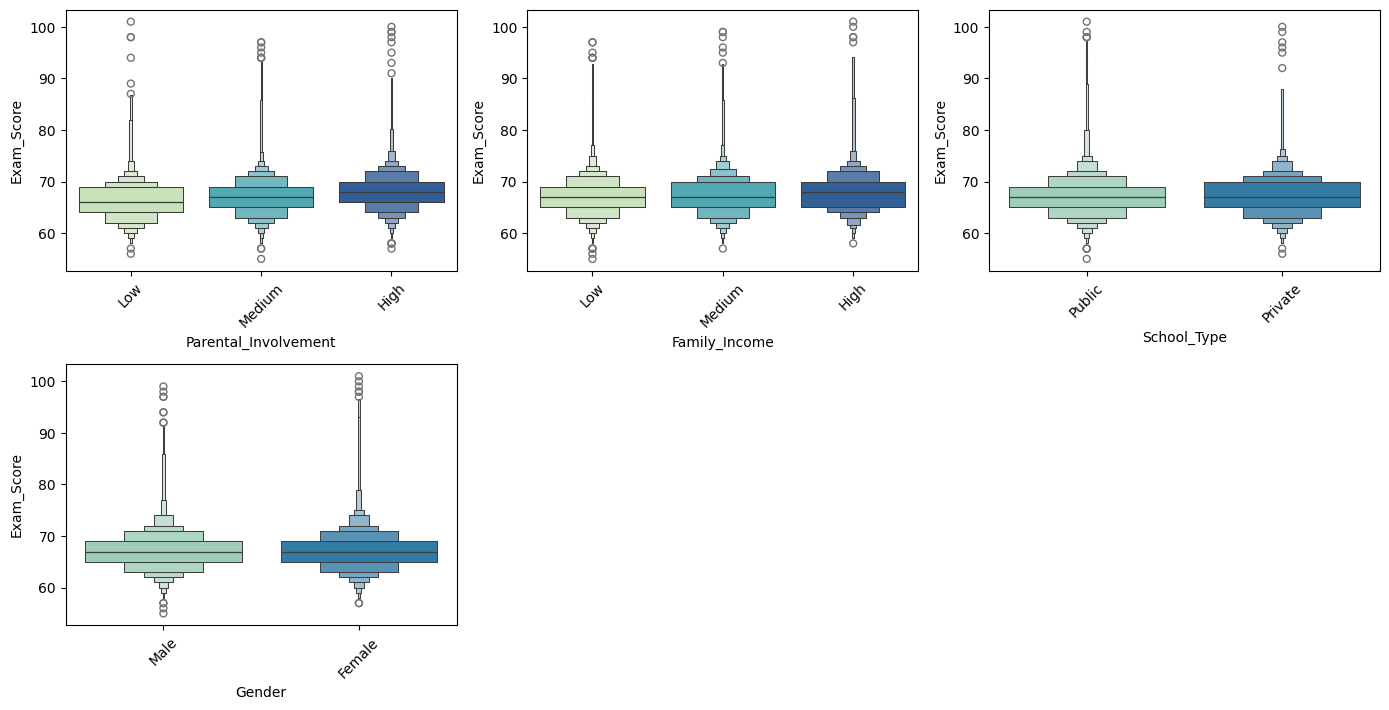

In [108]:
#box-plot
features = ['Parental_Involvement', 'Family_Income','School_Type', 'Gender']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxenplot(x=feature, y="Exam_Score", data=df,
                palette='YlGnBu')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

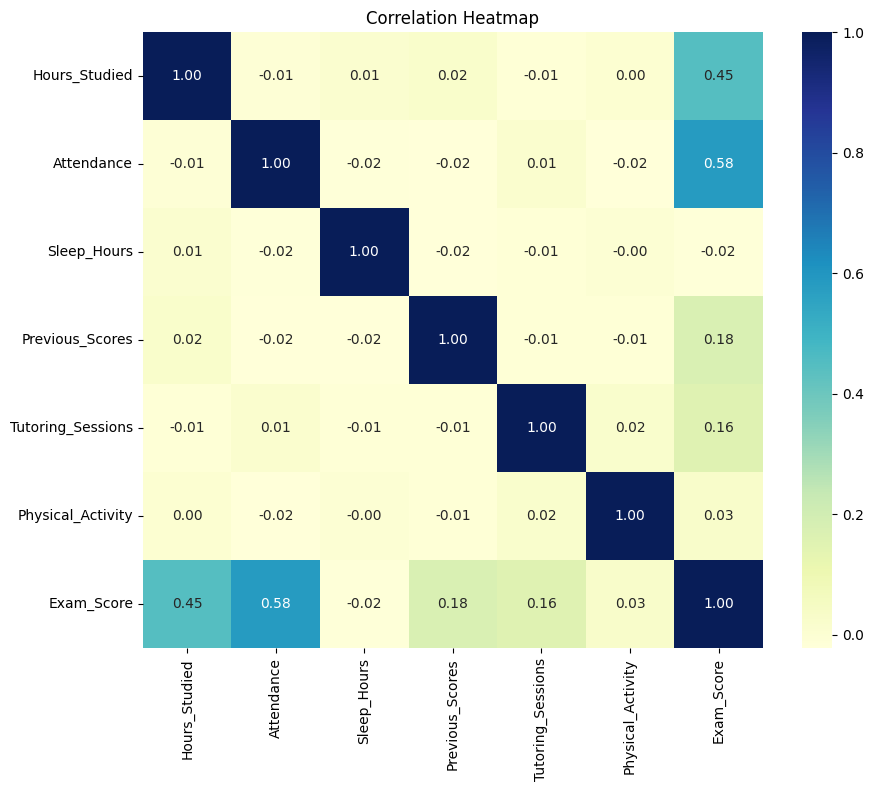

In [109]:
#correlation Heat map for the numeric values

numeric_data = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

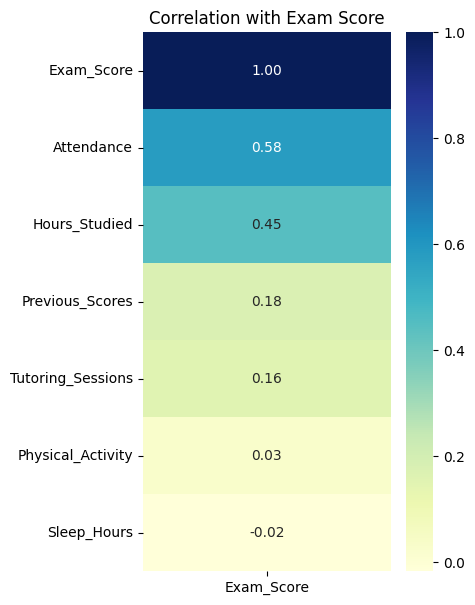

In [110]:
plt.figure(figsize=(4, 7))
correlation = numeric_data.corr()['Exam_Score'].sort_values(ascending=False).to_frame()
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title("Correlation with Exam Score")
plt.show()

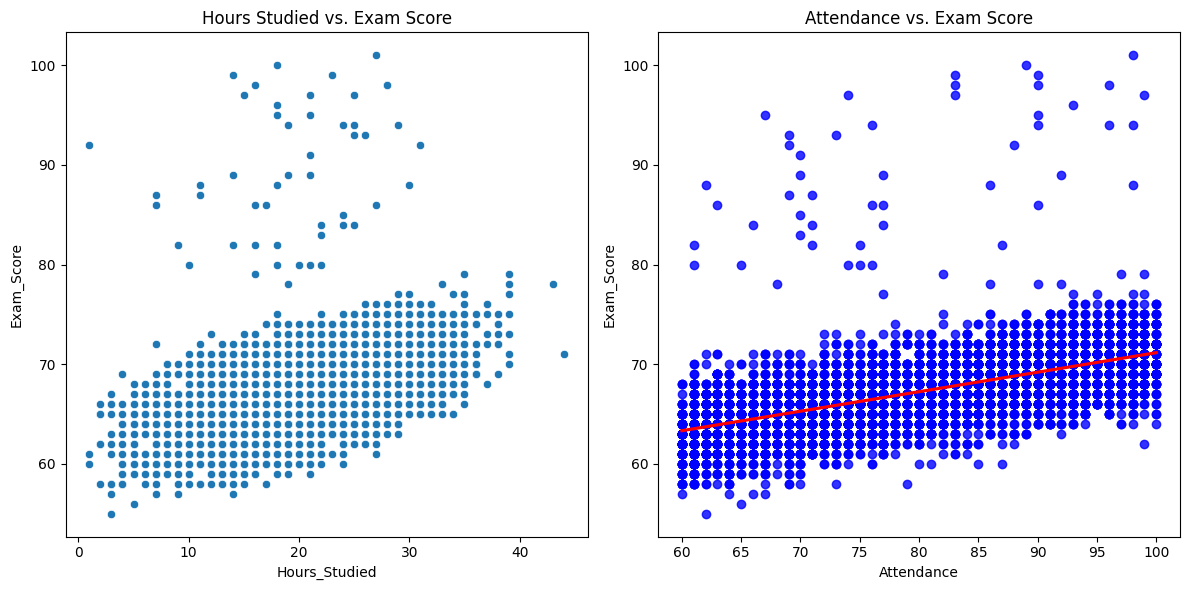

In [111]:
#scatterplot

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied vs. Exam Score")


plt.subplot(1, 2, 2)
sns.regplot(x='Attendance', y='Exam_Score', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Attendance vs. Exam Score")

plt.tight_layout()
plt.show()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Checking for missing values

In [113]:
missing = df.isnull().sum()
print(missing[missing > 0])

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


## Handle Missing Values
Since `Teacher_Quality`, `Parental_Education_Level`, and `Distance_from_Home` have missing values, let’s fill them with the mode.

In [114]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col].fillna(df[col].mode()[0], inplace=True)

## Checking for duplicate
check if there any dublicated records in the data

In [115]:
df.duplicated().sum()

0

## Describe the Statistics for Numeric Columns

This section focuses on summarizing the statistics related to the numeric columns in the dataset.

In [116]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Encode Categorical Variables
Identify categorical columns, then turn them into numerical values.

In [117]:
# Encoding The Categorical Data

Featuers1 = ['Parental_Involvement' ,'Family_Income', 'Access_to_Resources', 'Motivation_Level' ,'Teacher_Quality']
for feature in Featuers1:
  df[feature] = df[feature].apply(lambda x: 0 if x == 'Low' else (1 if x == 'Medium' else 2))

Featuers2 = ['Extracurricular_Activities' ,'Internet_Access', 'Learning_Disabilities']
for feature in Featuers2:
  df[feature] = df[feature].apply(lambda x: 0 if x == 'No' else 1)

df['School_Type'] = df['School_Type'].map({
    'Private': 0,
    'Public': 1
})

df['Peer_Influence'] = df['Peer_Influence'].map({
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
})

df['Parental_Education_Level'] = df['Parental_Education_Level'].map({
    'High School': 0,
    'College': 1,
    'Postgraduate': 2
})

df['Distance_from_Home'] = df['Distance_from_Home'].map({
    'Near': 1,
    'Moderate': 2,
    'Far': 3,
})

df['Gender'] = df['Gender'].map({
    'Male': 0,
    'Female': 1
})

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,1,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,2,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,1,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,2,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,1,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,1,2,2,0,0,1,1,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,1,2,2,0,0,1,1,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,1,0,2,0,2,1,1,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,0,2,3,0,0,3,1,68


## Linear Regression
We will start with a simple linear regression model to understand its performance on the dataset.


In [118]:


X = df.drop(columns=['Exam_Score'])  
y = df['Exam_Score']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_predic = linear_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_predic)
r2 = r2_score(y_test, y_predic)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print("train score = " , linear_regressor.score(X_train , y_train))
print("test score = " , linear_regressor.score(X_test , y_test))



Linear Regression Results:
Mean Squared Error: 2.89
R^2 Score: 0.80
train score =  0.7151773503761298
test score =  0.7984191003878729


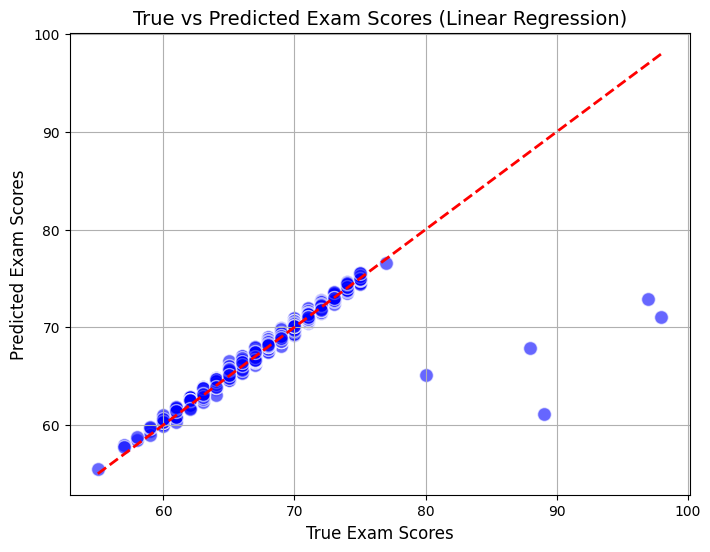

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predic, color='blue', alpha=0.6, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  
plt.title('True vs Predicted Exam Scores (Linear Regression)', fontsize=14)
plt.xlabel('True Exam Scores', fontsize=12)
plt.ylabel('Predicted Exam Scores', fontsize=12)
plt.grid(True)
plt.show()


**Random Forest Regression** 


In [120]:

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

y_pred_rf = random_forest_regressor.predict(X_test)

print("Random Forest Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.2f}")
print("Train Score: ", random_forest_regressor.score(X_train, y_train))
print("Test Score: ", random_forest_regressor.score(X_test, y_test))



Random Forest Regression Results:
Mean Squared Error: 4.41
R^2 Score: 0.69
Train Score:  0.9460781435037481
Test Score:  0.6927666127564287


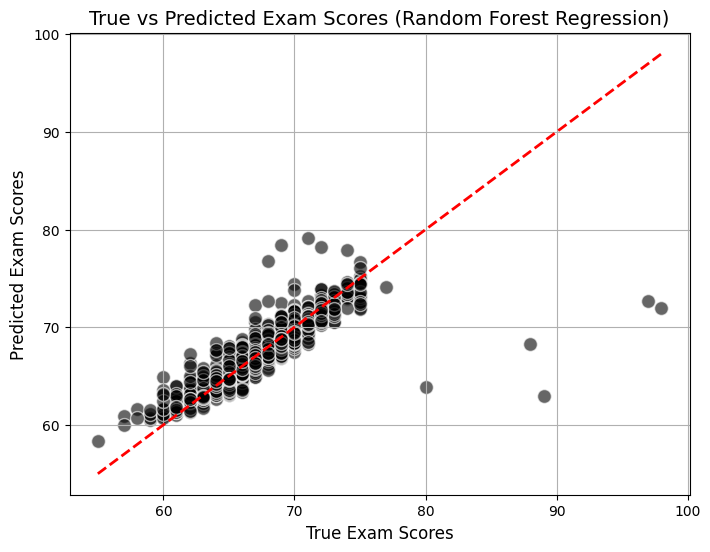

In [121]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='black', alpha=0.6, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  
plt.title('True vs Predicted Exam Scores (Random Forest Regression)', fontsize=14)
plt.xlabel('True Exam Scores', fontsize=12)
plt.ylabel('Predicted Exam Scores', fontsize=12)
plt.grid(True)
plt.show()


**Support Vector Regression (SVR)** 

In [122]:


svr_regressor = SVR()  
svr_regressor.fit(X_train, y_train)

y_pred_svr = svr_regressor.predict(X_test)

print("Support Vector Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_svr):.2f}")
print("Train Score: ", svr_regressor.score(X_train, y_train))
print("Test Score: ", svr_regressor.score(X_test, y_test))



Support Vector Regression Results:
Mean Squared Error: 3.00
R^2 Score: 0.79
Train Score:  0.7097507684068194
Test Score:  0.7911248561418386


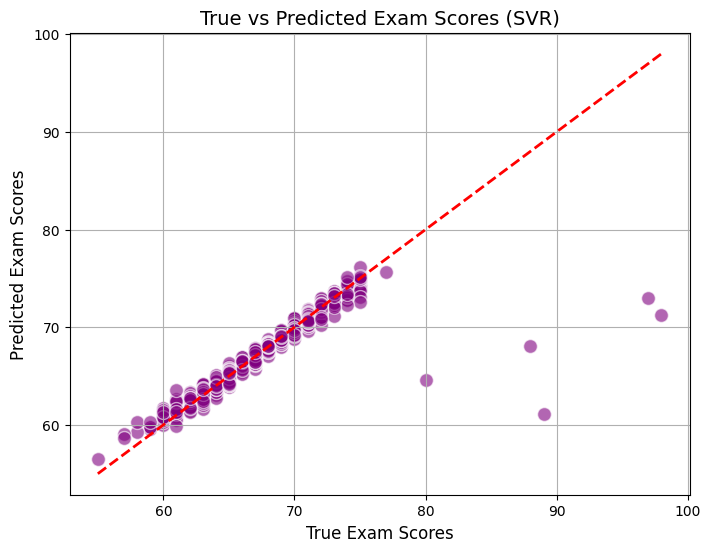

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='purple', alpha=0.6, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  
plt.title('True vs Predicted Exam Scores (SVR)', fontsize=14)
plt.xlabel('True Exam Scores', fontsize=12)
plt.ylabel('Predicted Exam Scores', fontsize=12)
plt.grid(True)
plt.show()


## Model Comparison: Linear Regression, SVR, and Random Forest


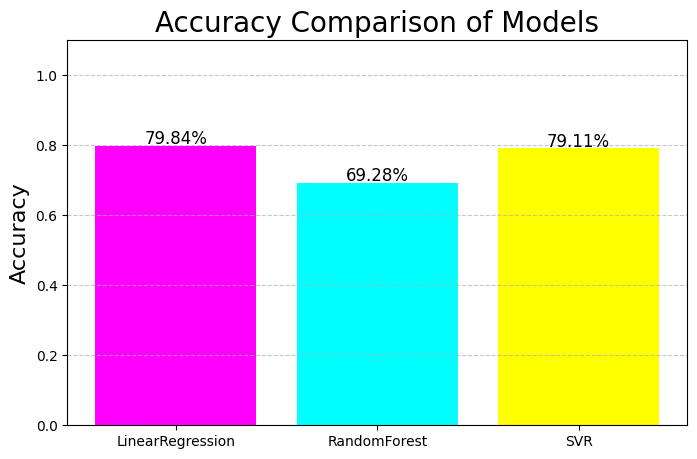

In [ ]:

names = ['LinearRegression', 'RandomForest', 'SVR']

acc = [
    linear_regressor.score(X_test, y_test),    
    random_forest_regressor.score(X_test, y_test),      
    svr_regressor.score(X_test, y_test)    
]

colors = ['magenta', 'cyan', 'yellow']
plt.figure(figsize=(8, 5))
plt.bar(names, acc, color=colors)
plt.title('Accuracy Comparison of Models', fontsize=20)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(acc):
    plt.text(i, value + 0.005 , f'{value*100:.2f}%', ha='center', fontsize=12, color='black')

plt.ylim(0, 1.1)
plt.show()
